# Raw Price Between Pairs Over Time
## Plotting the successful pairs by their raw prices over time in the same graph.

In [25]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import interact, Dropdown
import os

CSV path to successes directory

In [26]:
csv_folder_path = '../../data/processed/successes/'

Create a list of all the csv files from success directory

In [27]:
csv_files = []
for a_csv in os.listdir(csv_folder_path):
    if a_csv.endswith('.csv'):
        csv_files.append(a_csv)

Function to plot the graph

In [28]:
def create_graph(filename):
    # filename is in this format: X_X.csv
    # thus, in the code below, we extract the tickers from filename
    current_stock_pair = filename.replace(".csv", "")
    stock1, stock2 = current_stock_pair.split("_")

    # creates file path directory
    file_path = os.path.join(csv_folder_path, filename)
    data_frame = pd.read_csv(file_path)

    # Sets figure size to be 12x6
    plt.figure(figsize=(12, 6))

    # Plot both Y-values (raw price 1 and 2) against the x-axis (Date), and color code it respectively
    plt.plot(data_frame['Date'], data_frame[f"{stock1} Raw Price"], label=f"{stock1} Raw Price", color="#5f70f2")
    plt.plot(                    data_frame[f"{stock2} Raw Price"], label=f"{stock2} Raw Price", color='#DA4343')

    # Remove padding on x-axis
    plt.xlim(data_frame.index.min(), data_frame.index.max())

    # Set interval for Dates axis
    plt.xticks(data_frame['Date'][::10], rotation=45)

    # Softer grid
    sns.set_style("whitegrid")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.style.use('seaborn-v0_8-whitegrid')


    plt.title(f"Raw Prices Between {stock1} and {stock2} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Raw Price (USD)")
    plt.legend()
 
    plt.tight_layout()
    plt.show()

Make a dropdown widget and collect selected pair

In [29]:
dropdown_choice = Dropdown(options=csv_files, description='Select a cointegrated pair to graph:', style={'description_width': 'auto'}, layout=widgets.Layout(width='375px'))

Plot graph with selection from dropdown

interactive(children=(Dropdown(description='Select a cointegrated pair to graph:', layout=Layout(width='375px'…

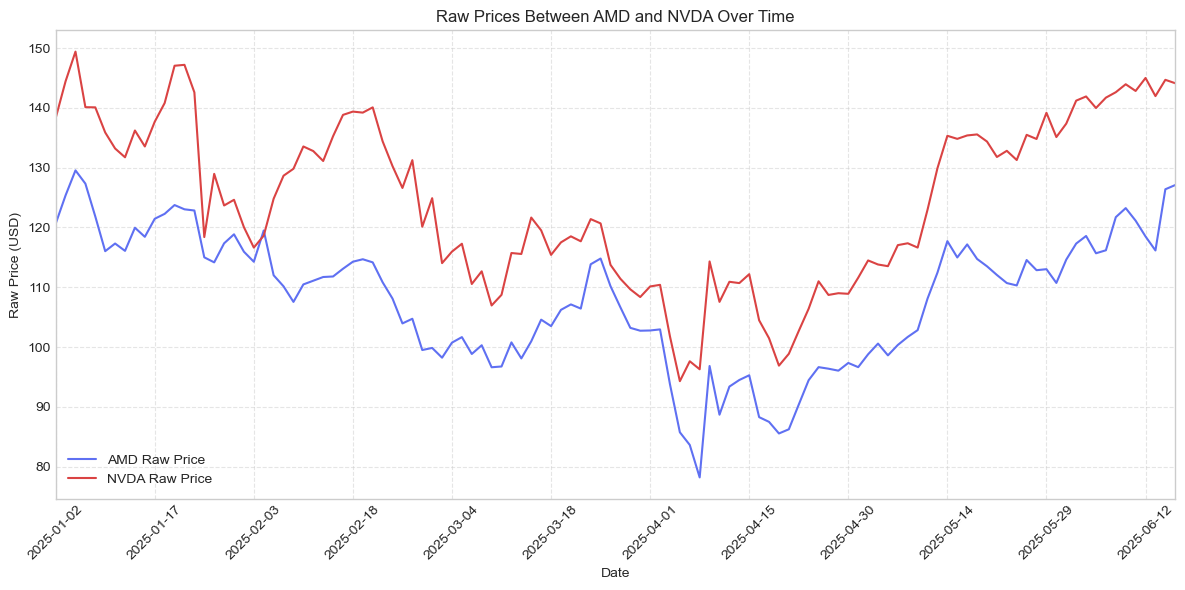

In [30]:
interact(create_graph, filename=dropdown_choice)
create_graph("AMD_NVDA.csv")